In [ ]:
!pip install qiskit==1.4.2

In [ ]:
pip install pylatexenc

In [ ]:
!pip install qiskit_aer

In [ ]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [ ]:
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram

import matplotlib.pyplot as plt


# Bell State Entanglement

Based on the framework outlined in the Perceval notebook, we can define the circuit for single photon, polarized-encoded Bell state entanglement of spatial modes with the following circuit

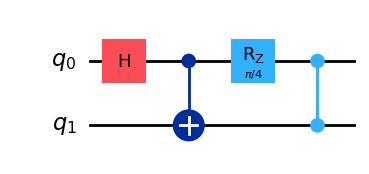

In [ ]:
# Define a custom subroutine for the beamsplitter operation
def black_box_subroutine(qc, q0, q1):
    qc.h(q0)  # Example operation (Hadamard)
    qc.cx(q0, q1)  # Example operation (CNOT)
    qc.rz(np.pi/4, q0)  # Example phase shift
    qc.cz(q0, q1)  # Controlled-Z gate as part of the black box

# Create a circuit and apply the subroutine
qc = QuantumCircuit(2)
black_box_subroutine(qc, 0, 1)

# Draw the circuit with the custom black box operations
qc.draw('mpl')

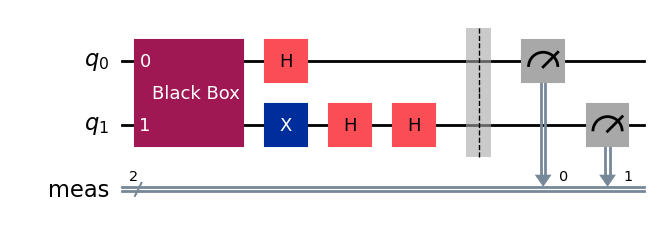

In [ ]:
from qiskit.circuit import Gate

black_box_circuit = QuantumCircuit(2)
black_box_subroutine(black_box_circuit, 0, 1)
black_box_gate = black_box_circuit.to_gate(label='Black Box')

qc = QuantumCircuit(2)
qc.append(black_box_gate, [0, 1])

qc.h(0)

qc.x(1)
qc.h(1)

qc.h(1)

qc.measure_all()
qc.draw('mpl')

Since we know the circuit is balanced, we can effectively ignore the Black Box and obtain the standard Bell state entanglement circuit:

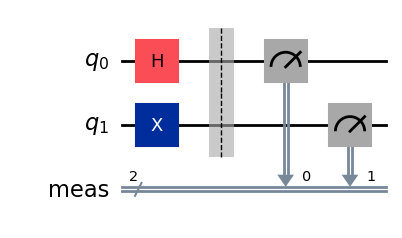

In [ ]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)

qc.measure_all()
qc.draw('mpl')

# CHSH Inequality

We can now calculate measurement correlations using the Clauser-Horne-Shimony-Holt inequality to confirm entanglement. The CHSH inequality is defined as follows:

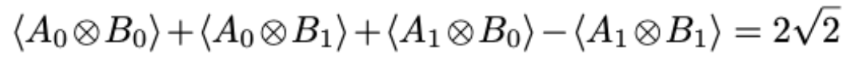

where A0 and A1 are the polarization bases for spatial mode A and B0 and B1 are the polarization bases for spatial mode B.


To change the measurement basis appropriately, we will rotate the Bell state around the Bloch sphere by an angle θ such that it produces the state:

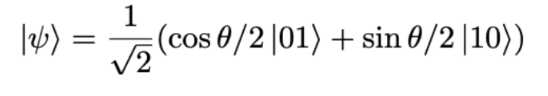

In Qiskit, this is effectively accomplished by applying an Ry gate following the Bell state creation.


In [ ]:
# Define Pauli operators
a = SparsePauliOp('IX')
A = SparsePauliOp('IZ')
B = SparsePauliOp('XI')
b = SparsePauliOp('ZI')

# Calculate CHSH witness operator
obsv = A.compose(B) - A.compose(b) + a.compose(B) + a.compose(b)

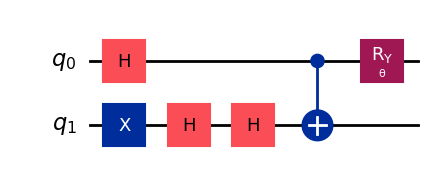

In [ ]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.h(0)

qc.x(1)
qc.h(1)

qc.h(1)

qc.cx(0, 1)
qc.ry(theta, 0) # to change the measurement basis from just X and Y, we want to do a rotation around the Bloch sphere

qc.draw('mpl')

In [ ]:
angles_to_test = np.linspace(0, 2*np.pi, 25)
angles: list[list[float]] = []
for angle in angles_to_test:
    angles.append([angle])

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

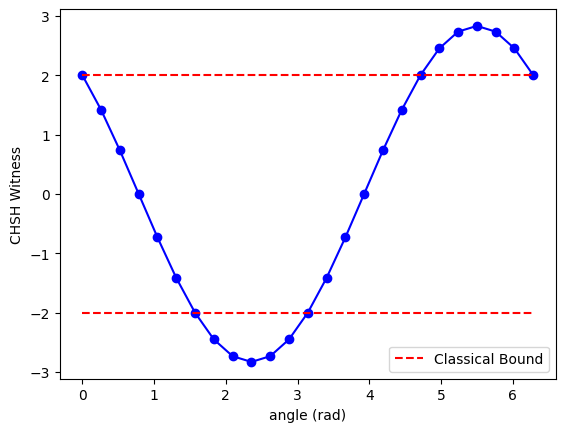

In [ ]:
estimator = Estimator()
job = estimator.run([qc]*len(angles), observables=[obsv]*len(angles), parameter_values=angles)
exps = job.result().values

plt.plot(angles, exps, marker='o', ls='-', color='blue')
plt.plot(angles, [2]*len(angles), ls='--', color='red', label='Classical Bound')
plt.plot(angles, [-2]*len(angles), ls='--', color='red')
plt.xlabel('angle (rad)')
plt.ylabel('CHSH Witness')
plt.legend(loc=4)

This clearly shows a **successful violation** of the CHSH inequality.